In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
df =pd.read_csv('playstore-analysis.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# Data clean up – Missing value treatment

In [54]:
df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

#### a. Drop records where rating is missing since rating is our target/study variable

In [55]:
df1=df.dropna(subset=["Rating"])
print(df1['Rating'].isnull().any())
df1.isnull().any()


        

False


App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

#### Check the null values for the Android Ver column.

In [56]:
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Drop the 3rd record i.e. record for “Life Made WIFI …”

In [57]:
df2=df1.drop([10472])
df2[df2['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### Replace remaining missing values with the mode

In [58]:
df2['Android Ver']=df2['Android Ver'].fillna(df2['Android Ver'].mode()[0])
df2.iloc[4490]


App                            Vigo Video
Category                    VIDEO_PLAYERS
Rating                                4.3
Reviews                           1615418
Size                         21516.529524
Installs                      50,000,000+
Type                                 Free
Price                                   0
Content Rating                       Teen
Genres            Video Players & Editors
Last Updated               August 3, 2018
Current Ver            Varies with device
Android Ver                  4.0.3 and up
Name: 4686, dtype: object

#### Current ver – replace with most common value

In [59]:
df2[df2['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [60]:
df2['Current Ver']=df2['Current Ver'].fillna(df2['Current Ver'].mode()[0])

In [61]:
df2.iloc[1553]

App                  Etta Homes
Category              LIFESTYLE
Rating                      4.2
Reviews                     220
Size                    15000.0
Installs                50,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                Lifestyle
Last Updated      July 26, 2018
Current Ver               9.1.0
Android Ver          5.0 and up
Name: 1635, dtype: object

# Data clean up – correcting the data types

#### Price variable – remove $ sign and convert to float

In [62]:
df2['Price']=df2['Price'].str.replace(r'$','',regex=True).astype(float)

In [63]:
df2[df2.Price>0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,861.000000,100+,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1+,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.000000,"1,000+",Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.000000,"10,000+",Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


#### Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [64]:
df2['Installs']=df2['Installs'].str.replace(r',','',regex=True)
df2['Installs']=df2['Installs'].str.replace(r'+','',regex=True).astype('int64')


#### Convert all other identified columns to numeric

In [65]:
df2['Reviews']=df2['Reviews'].astype('int64')

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


# Sanity checks – check for the following and handle accordingly

### Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.

In [67]:
df2[(df2['Rating']<1)|(df2['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [68]:
df2.drop(df2[(df2['Installs']<df2['Reviews'])].index,inplace=True)


### Reviews should not be more than installs as only those who installed can review the app.

In [69]:
df2[(df2['Installs']<df2['Reviews'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Identify and handle outliers 

### Price column

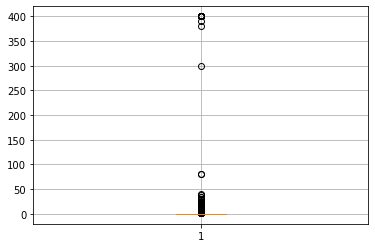

In [70]:
plt.boxplot(df2['Price'])
plt.grid()
plt.show()



In [71]:
df2.drop(df2[(df2['Price']>200)].index,inplace=True)

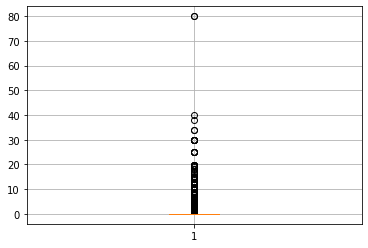

In [72]:
plt.boxplot(df2['Price'])
plt.grid()
plt.show()

In [73]:
df2.drop(df2[(df2['Price']>=30)].index,inplace=True)

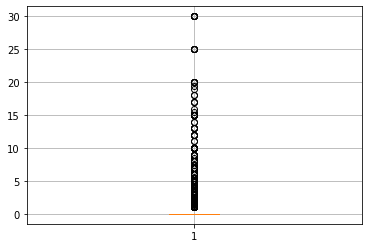

In [74]:
plt.boxplot(df2['Price'])
plt.grid()
plt.show()

### . Reviews column

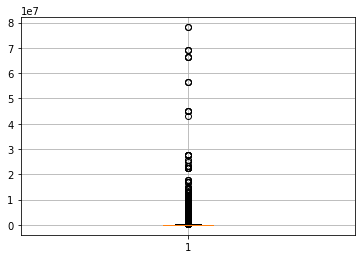

In [75]:
plt.boxplot(df2['Reviews'])
plt.grid()
plt.show()

In [76]:
df2.drop(df2[(df2['Reviews']>1000000)].index,inplace=True)

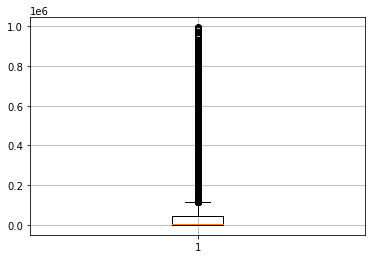

In [77]:
plt.boxplot(df2['Reviews'])
plt.grid()
plt.show()

### Installs

In [78]:
percentile_95=df2['Installs'].quantile(0.95)
print(percentile_95)

10000000.0


In [79]:
# dropping records more than 95th percentile
df2.drop(df2[(df2['Installs']>percentile_95)].index,inplace=True)

In [80]:
df2.reset_index(inplace=True)

# Data analysis to answer business questions

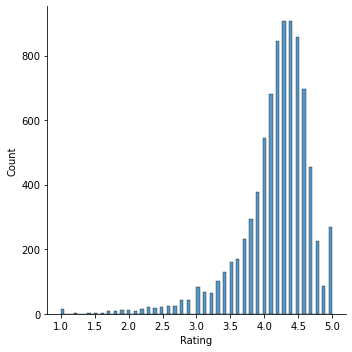

In [81]:
sns.displot(df2['Rating'])


 from the above plot by viewing it ,we can conclude that the plot is left skewed.

## What are the top Content Rating values?

<AxesSubplot:ylabel='Content Rating'>

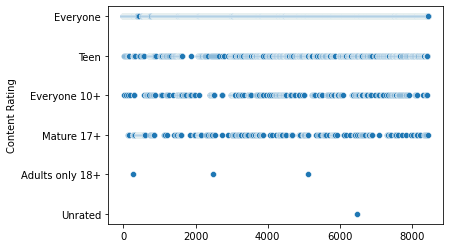

In [82]:
sns.scatterplot(x=df2['Content Rating'].index,y=df2['Content Rating'])

In [83]:
df2.drop(df2[(df2['Content Rating']=='Adults only 18+')|(df2['Content Rating']=='Unrated')].index,inplace=True)

<AxesSubplot:ylabel='Content Rating'>

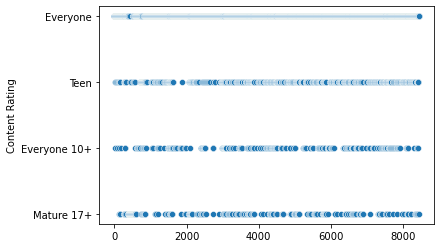

In [84]:
sns.scatterplot(x=df2['Content Rating'].index,y=df2['Content Rating'])

## Effect of size on rating

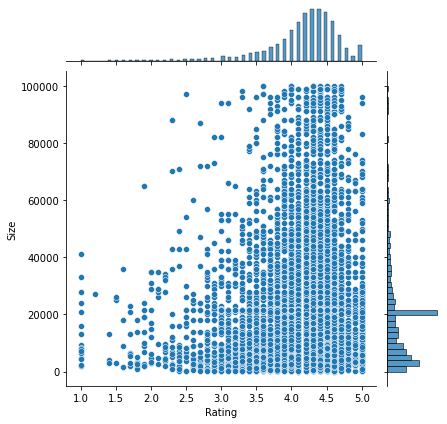

In [85]:
sns.jointplot(x=df2['Rating'],y=df2['Size'])

The above plot concludes that rating is proportional to memory size of the application

## Effect of size on rating

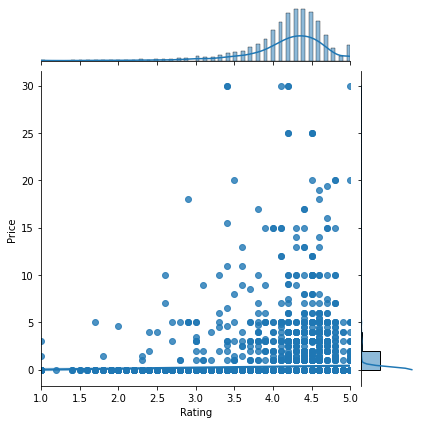

In [86]:
sns.jointplot(x=df2['Rating'], y=df2['Price'], kind="reg")

## Replot the data, this time with only records with price > 0

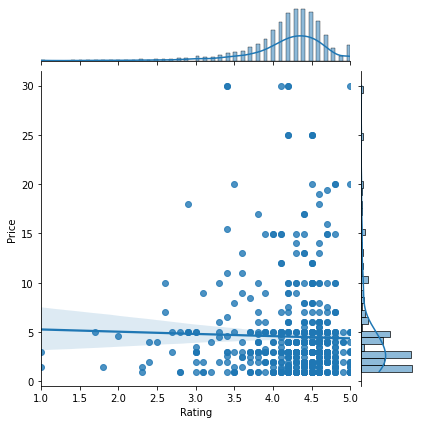

In [87]:
c=df2['Price'][df2['Price']>0]
sns.jointplot(x=df2['Rating'], y=c, kind="reg")

Yes,the pattern changes when we consider the price above zero.
From the above plot,we can say that most of the apps are priced between 4 and 7 dollars. 

## Look at all the numeric interactions together

### . Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

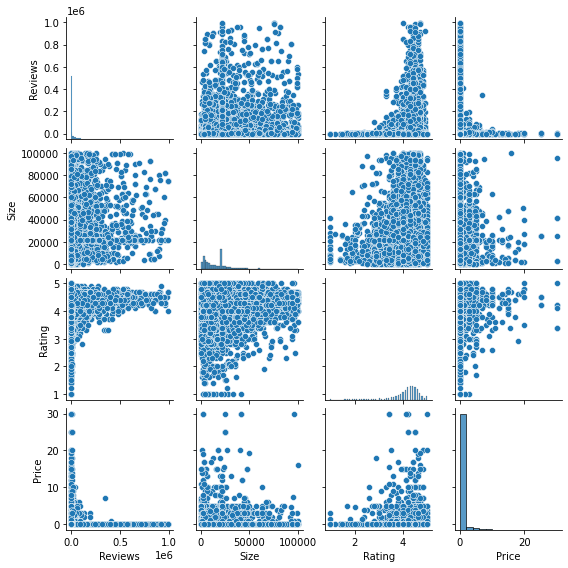

In [88]:
sns.pairplot(df2,vars=['Reviews','Size','Rating','Price'],height=2)
plt.show()

### Rating vs. content rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

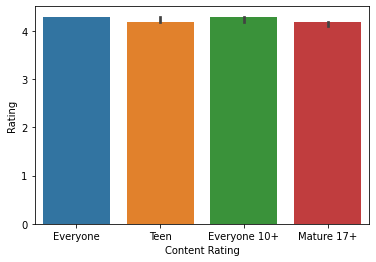

In [89]:

sns.barplot(x=df2['Content Rating'],y=df2['Rating'],estimator=np.median)

for metric,median is used.

In [90]:
df4=df2.copy()

Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size
b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination
c. Make a heatmap of this
i. Annotated
ii. Greens color map
d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [91]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df4['Bucket Size'] = pd.cut(df4['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df4, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [92]:

temp3=pd.pivot_table(df4, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


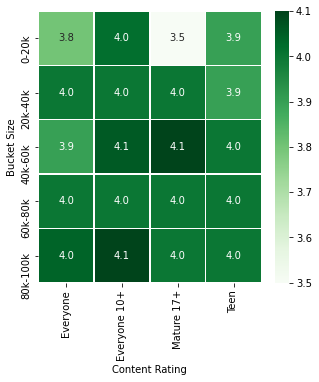

In [93]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8431 entries, 0 to 8434
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           8431 non-null   int64  
 1   App             8431 non-null   object 
 2   Category        8431 non-null   object 
 3   Rating          8431 non-null   float64
 4   Reviews         8431 non-null   int64  
 5   Size            8431 non-null   float64
 6   Installs        8431 non-null   int64  
 7   Type            8431 non-null   object 
 8   Price           8431 non-null   float64
 9   Content Rating  8431 non-null   object 
 10  Genres          8431 non-null   object 
 11  Last Updated    8431 non-null   object 
 12  Current Ver     8431 non-null   object 
 13  Android Ver     8431 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB
